In [8]:
import os
os.chdir("C:/Users/Hariharanath Elluru/Desktop")

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dataset=pd.read_csv("credit_card.csv")

In [10]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,2576,-0.489319,0.948805,1.438957,-0.210959,0.202546,-0.365122,0.674020,0.059537,-0.743545,...,-0.176425,-0.488874,-0.035665,-0.004285,-0.146752,0.071494,0.258221,0.111059,19.99,0
3025,2577,-0.788117,0.530917,1.154818,-1.222892,2.252224,4.140995,0.085894,0.567272,1.062958,...,-0.332944,-0.174903,-0.308133,1.026302,0.112384,0.252665,0.061100,-0.370800,9.20,0
3026,2577,-1.335640,0.093758,1.716347,0.321310,0.597336,-1.024550,0.340861,-0.280405,0.461778,...,-0.308835,-0.355747,-0.393202,0.419444,-0.127249,0.201127,0.049004,-0.085552,34.38,0
3027,2579,1.075184,-0.548171,0.400197,0.222458,-0.825993,-0.449382,-0.257455,-0.043962,0.787786,...,-0.047667,-0.283941,-0.143161,-0.053911,0.264154,1.036210,-0.084159,0.020492,115.00,0


# Taking care of missing data

In [11]:
dataset.shape

(3029, 31)

In [12]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
dataset["Class"].value_counts()

0    3027
1       2
Name: Class, dtype: int64

In [14]:
FilteredData = dataset[['Time','Amount', 'Class']]

In [15]:
FilteredData

,Time,Amount,Class
0,0,149.62,0
1,0,2.69,0
2,1,378.66,0
3,1,123.50,0
4,2,69.99,0
...,...,...,...
3024,2576,19.99,0
3025,2577,9.20,0
3026,2577,34.38,0
3027,2579,115.00,0


In [16]:
FilteredData.shape

(3029, 3)

In [17]:
FilteredData["Class"].value_counts()

0    3027
1       2
Name: Class, dtype: int64

C:\Users\Hariharanath Elluru\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


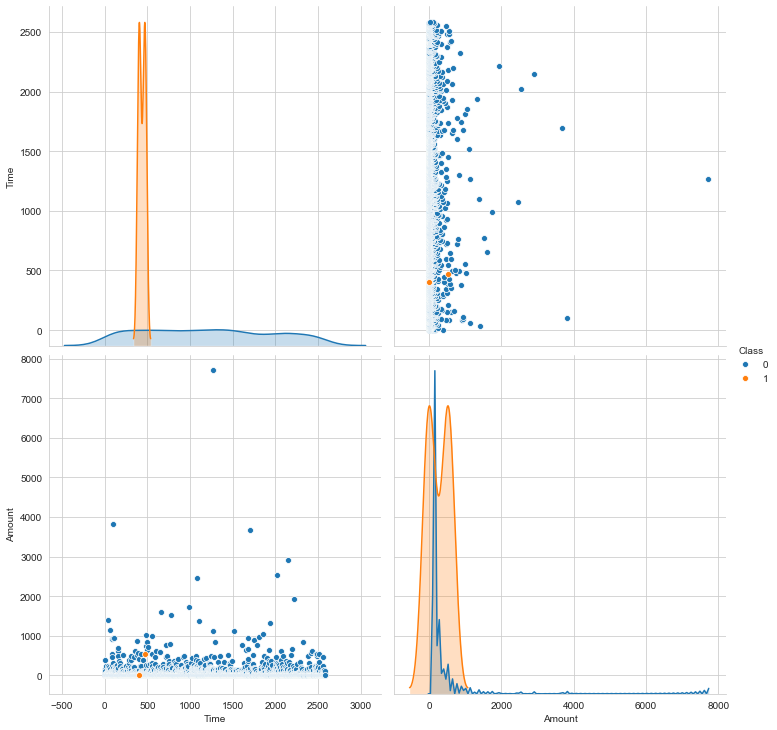

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

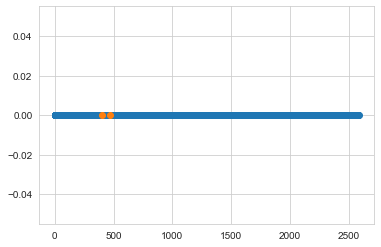

In [19]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()


In [20]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  67.66024116286745
Mean of transaction amount of fraud transactions:  264.5


In [21]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  231.84321920289548
Std-Deviation of transaction amount of fraud transactions:  264.5


In [22]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  13.99
Median of transaction amount of fraud transactions:  264.5


In [23]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.     3.84  13.99  56.805]
[  0.   132.25 264.5  396.75]


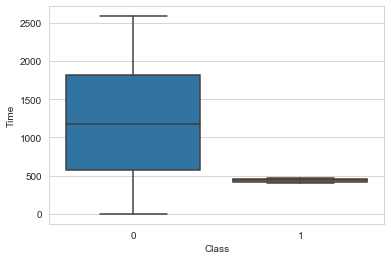

In [24]:
sns.boxplot(x = "Class", y = "Time", data = dataset)
plt.show()

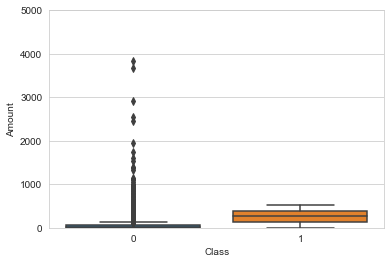

In [25]:
sns.boxplot(x = "Class", y = "Amount", data = dataset)
plt.ylim(0, 5000)
plt.show()

In [26]:
x=features = dataset.iloc[0:,:-1].values

In [27]:
features

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [ 2.57700000e+03, -1.33564027e+00,  9.37583940e-02, ...,
         4.90041370e-02, -8.55519690e-02,  3.43800000e+01],
       [ 2.57900000e+03,  1.07518377e+00, -5.48171298e-01, ...,
        -8.41593880e-02,  2.04919390e-02,  1.15000000e+02],
       [ 2.58500000e+03, -1.96883048e-01,  2.24007480e-02, ...,
         6.78635210e-02,  4.76127700e-02,  1.51000000e+01]])

In [28]:
y=labels = dataset.iloc[:,-1].values

In [29]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
#Get a count of missing values in the dataset
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df1 = pd.DataFrame(features)

In [32]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [33]:
dataset.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# splitting training and testing data

In [34]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
x_train

array([[ 2.48000000e+02, -2.16866831e-01,  9.00896218e-01, ...,
         1.08635141e-01,  5.29809150e-02,  1.00000000e+01],
       [ 2.40400000e+03, -8.61488000e-01,  1.14382916e+00, ...,
         1.78663242e-01,  9.83476570e-02,  1.00000000e+00],
       [ 1.47200000e+03, -4.42295223e+00, -4.84103406e+00, ...,
        -3.87577546e-01, -9.21483600e-03,  1.40550000e+02],
       ...,
       [ 1.63300000e+03, -5.64867530e-01,  7.47609603e-01, ...,
         3.90897089e-01,  2.22597270e-01,  1.38000000e+01],
       [ 4.42000000e+02, -6.27616604e-01,  8.41973755e-01, ...,
        -4.67112727e-01, -2.71084430e-01,  2.23000000e+00],
       [ 1.73600000e+03, -2.93127559e+00,  3.00500959e+00, ...,
        -7.94033670e-02, -1.29714853e-01,  1.82500000e+01]])

In [36]:
y_train = y_train.astype('int')
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
x_test

array([[ 8.73000000e+02, -1.53599810e+00,  5.34114210e-02, ...,
         1.87091417e-01, -5.13413690e-02,  1.00000000e+00],
       [ 1.90000000e+02, -1.50577916e+00, -2.15325117e-01, ...,
        -3.35617814e-01, -4.13379326e-01,  8.22900000e+01],
       [ 2.41000000e+02, -8.49347742e-01,  1.01950772e+00, ...,
        -1.18769728e+00, -6.54815656e-01,  1.22000000e+01],
       ...,
       [ 8.78000000e+02, -1.17380420e+00,  2.81003682e-01, ...,
         1.30965273e-01, -8.27223670e-02,  6.97000000e+01],
       [ 1.15800000e+03,  1.02415921e+00, -6.59598886e-01, ...,
        -5.40279700e-02,  1.64629450e-02,  7.54600000e+01],
       [ 1.05900000e+03,  1.27607703e+00, -4.80325175e-01, ...,
        -5.45154370e-02,  2.60613990e-02,  4.84300000e+01]])

In [38]:
y_test = y_test.astype('int')
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
keras.__version__

'2.3.1'

In [42]:
model=Sequential()

In [43]:
x_train.shape

(2423, 30)

In [56]:
model.add(Dense(input_dim=11,init="random_uniform",activation='relu',output_dim=15))#input layer

C:\Users\Hariharanath Elluru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=15, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [57]:
model.add(Dense(output_dim=8,init="random_uniform",activation='relu'))#hidden layer

C:\Users\Hariharanath Elluru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [58]:
model.add(Dense(output_dim=1,init='random_uniform',activation='sigmoid'))#output layer

C:\Users\Hariharanath Elluru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])#adam=batch gradent descent

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
y_pred=clf.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Label encoding

# One hot Encoding